scikit-learnに収録されているirisデータをscikit-learnに収録されている分類器で分類し、その性能を比較する。

In [24]:
# scikit-learnのサンプルコードを参考にコードを作成
# URL: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

# Code source: Gaël Varoquaux,Andreas Müller
# Modified for documentation by Jaques Grobler
# Modified for documentation by Kaoru Hiramatsu
# License: BSD 3 clause

# scikit-learn, pandas, numpy パッケージをインポート
import pandas as pd
import numpy as np
import sklearn 
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [25]:
# 分類器を準備
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [26]:
# 利用するirisデータの特徴量とラベルを準備する
iris = load_iris()

iris_data = [['setona', 
              pd.DataFrame(data=iris.data, columns=iris.feature_names).iloc[0:50, :],
              pd.Series(iris.target)[0:50]], 
             ['versicolor', 
              pd.DataFrame(data=iris.data, columns=iris.feature_names).iloc[50:100, :],
              pd.Series(iris.target)[50:100]],
             ['versinica',
              pd.DataFrame(data=iris.data, columns=iris.feature_names).iloc[100:150, :],
              pd.Series(iris.target)[100:150]],
            ]

0 1 setona x versicolor 0 1 sepal length (cm) x sepal width (cm)
0 1 setona x versicolor 0 2 sepal length (cm) x petal length (cm)
0 1 setona x versicolor 0 3 sepal length (cm) x petal width (cm)
0 1 setona x versicolor 1 2 sepal width (cm) x petal length (cm)
0 1 setona x versicolor 1 3 sepal width (cm) x petal width (cm)
0 1 setona x versicolor 2 3 petal length (cm) x petal width (cm)


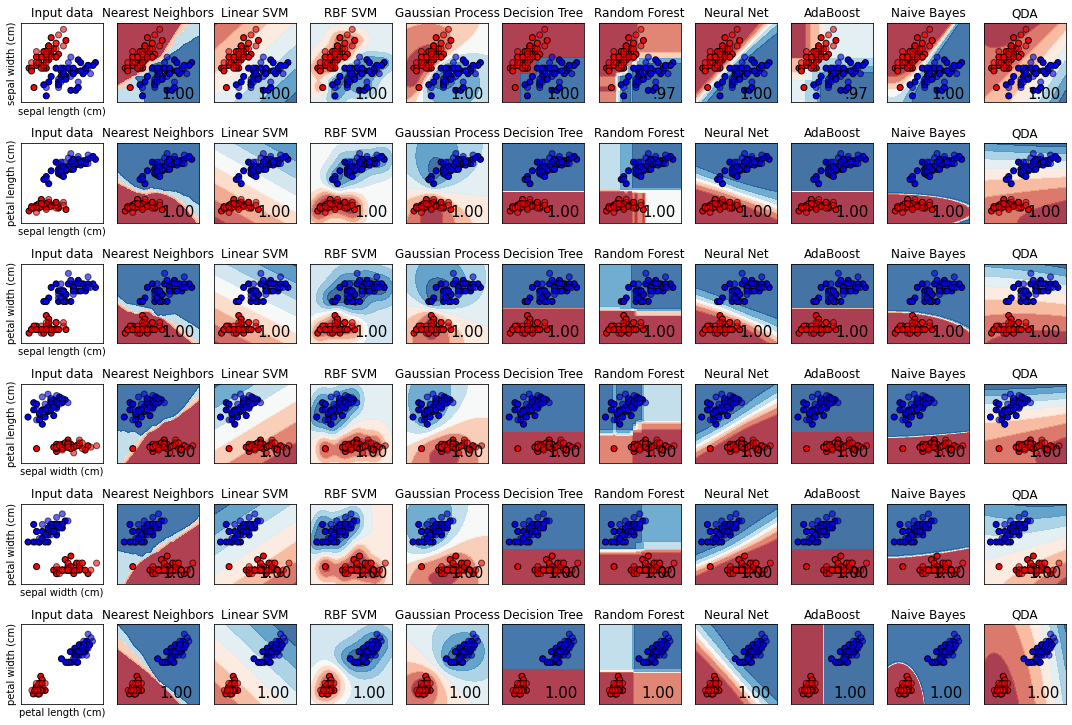

0 2 setona x versinica 0 1 sepal length (cm) x sepal width (cm)
0 2 setona x versinica 0 2 sepal length (cm) x petal length (cm)
0 2 setona x versinica 0 3 sepal length (cm) x petal width (cm)
0 2 setona x versinica 1 2 sepal width (cm) x petal length (cm)
0 2 setona x versinica 1 3 sepal width (cm) x petal width (cm)
0 2 setona x versinica 2 3 petal length (cm) x petal width (cm)


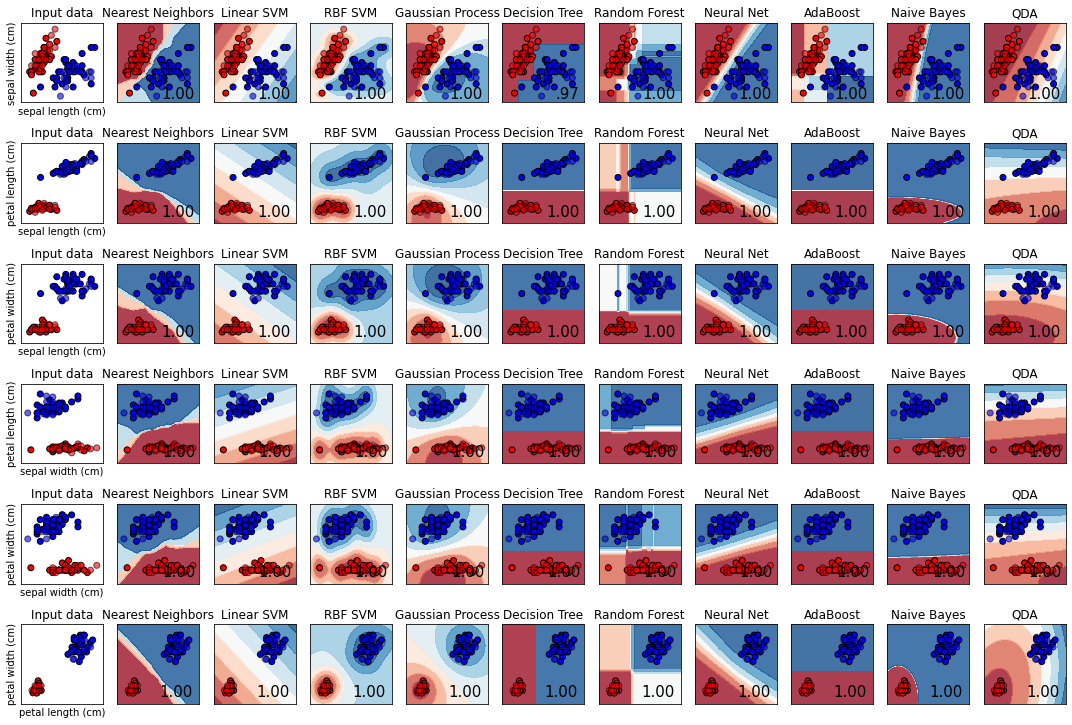

1 2 versicolor x versinica 0 1 sepal length (cm) x sepal width (cm)
1 2 versicolor x versinica 0 2 sepal length (cm) x petal length (cm)
1 2 versicolor x versinica 0 3 sepal length (cm) x petal width (cm)
1 2 versicolor x versinica 1 2 sepal width (cm) x petal length (cm)
1 2 versicolor x versinica 1 3 sepal width (cm) x petal width (cm)
1 2 versicolor x versinica 2 3 petal length (cm) x petal width (cm)


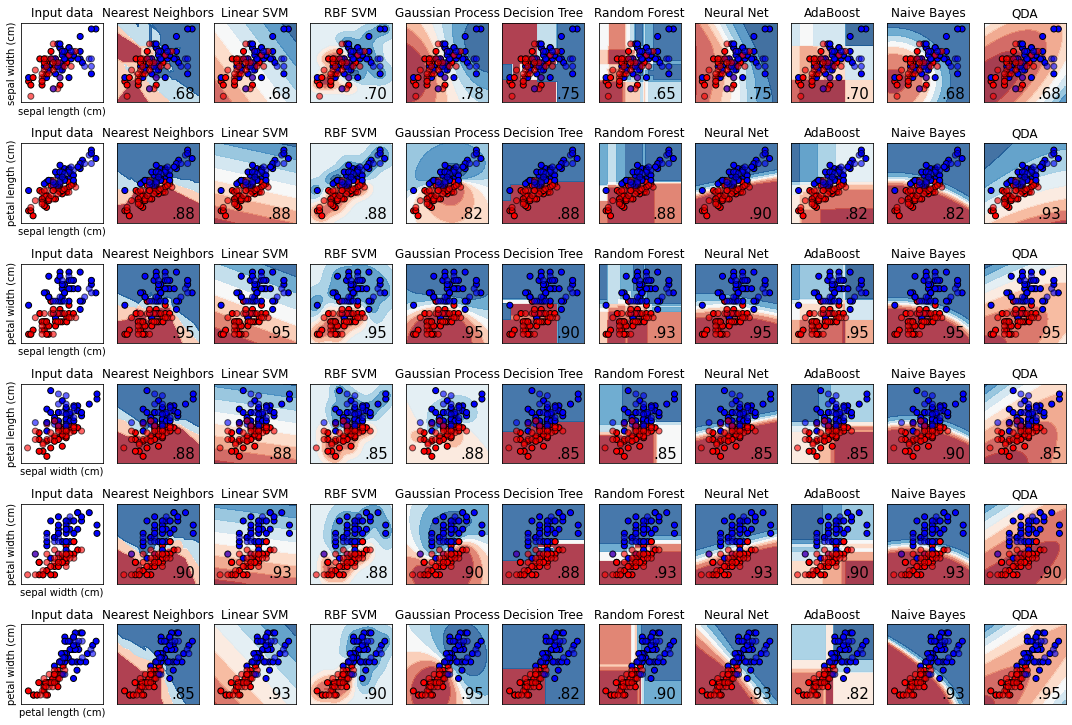

In [42]:
# irisデータから2品種ずつ取り出し、4種類の特徴量から2種類ずつ利用して、各分類器の評価を実施

# dataset_length = 6
# print(dataset_length)
for i in range(len(iris_data)):
    for j in range(i + 1, len(iris_data)):

        # プロットエリアのサイズと、メッシュ幅を設定
        figure = plt.figure(figsize=(15, 20))
        h = .02  # メッシュ幅
        m = 1 # subplotする位置
        dataset_length = len(iris.feature_names) * (len(iris.feature_names) -1)
    
        for k in range(len(iris.feature_names)):
            for l in range(k + 1, len(iris.feature_names)):
                print(i, j, iris_data[i][0], 'x', iris_data[j][0], k, l, iris.feature_names[k], 'x', iris.feature_names[l])
                
                X = pd.concat([iris_data[i][1].loc[:, [iris.feature_names[k], iris.feature_names[l]]], 
                               iris_data[j][1].loc[:, [iris.feature_names[k], iris.feature_names[l]]]])
                X = StandardScaler().fit_transform(X)
                y = pd.concat([iris_data[i][2], iris_data[j][2]])

                # データを学習用とテスト用に分割
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

                x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
                y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
                xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

                # irisデータの散布図を作成
                cm = plt.cm.RdBu
                cm_bright = ListedColormap(['#FF0000', '#0000FF'])
                ax = plt.subplot(dataset_length, len(classifiers) + 1, m)
                ax.set_title("Input data")
                ax.set_xlabel(iris.feature_names[k])
                ax.set_ylabel(iris.feature_names[l])

                # 学習用データをプロット
                ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')

                # テスト用データをプロット
                ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')

                ax.set_xlim(xx.min(), xx.max())
                ax.set_ylim(yy.min(), yy.max())
                ax.set_xticks(())
                ax.set_yticks(())

                m = m + 1

                # 分類器毎に分類と評価を行い、結果をプロット
                for name, clf in zip(names, classifiers):
                    ax = plt.subplot(dataset_length, len(classifiers) + 1, m)
                    clf.fit(X_train, y_train)
                    score = clf.score(X_test, y_test)

                    # 分類における決定境界をプロット
                    if hasattr(clf, "decision_function"):
                        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
                    else:
                        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

                    # 結果に色を付けてプロット
                    Z = Z.reshape(xx.shape)
                    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

                    # 学習データをプロット
                    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
                    # テストデータをプロット
                    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)

                    ax.set_xlim(xx.min(), xx.max())
                    ax.set_ylim(yy.min(), yy.max())
                    ax.set_xticks(())
                    ax.set_yticks(())
                    ax.set_title(name)
                    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')

                    m = m + 1
    
        plt.tight_layout()
        plt.show()